## 6.1: Drawing animated graphs

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))

x = np.linspace(-3, 3, 91)
t = np.linspace(1, 25, 30)
X2, T2 = np.meshgrid(x, t)
 
sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))
line = ax.plot(x, F[0, :], color='k', lw=2)[0]

def animate(i):
    line.set_ydata(F[i, :])

anim = FuncAnimation(
    fig, animate, interval=100, frames=len(t)-1)
 
plt.draw()
plt.show()

### 6.2: Building an animated Histogram

<IPython.core.display.Javascript object>


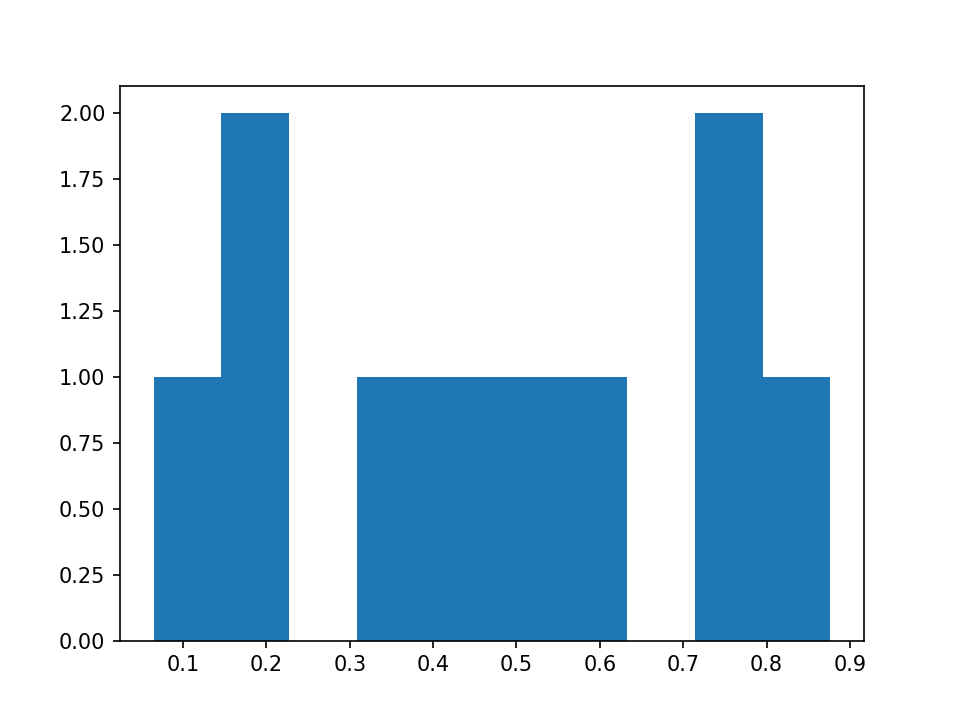

In [18]:
import matplotlib.animation as animation
%matplotlib notebook

n = 100
number_of_frames = 10
data = np.random.rand(n, number_of_frames)

def update_hist(num, data):
    plt.cla()
    plt.hist(data[num])

fig = plt.figure()
hist = plt.hist(data[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )
plt.show()

### 6.3: Creating animated subplots

<IPython.core.display.Javascript object>


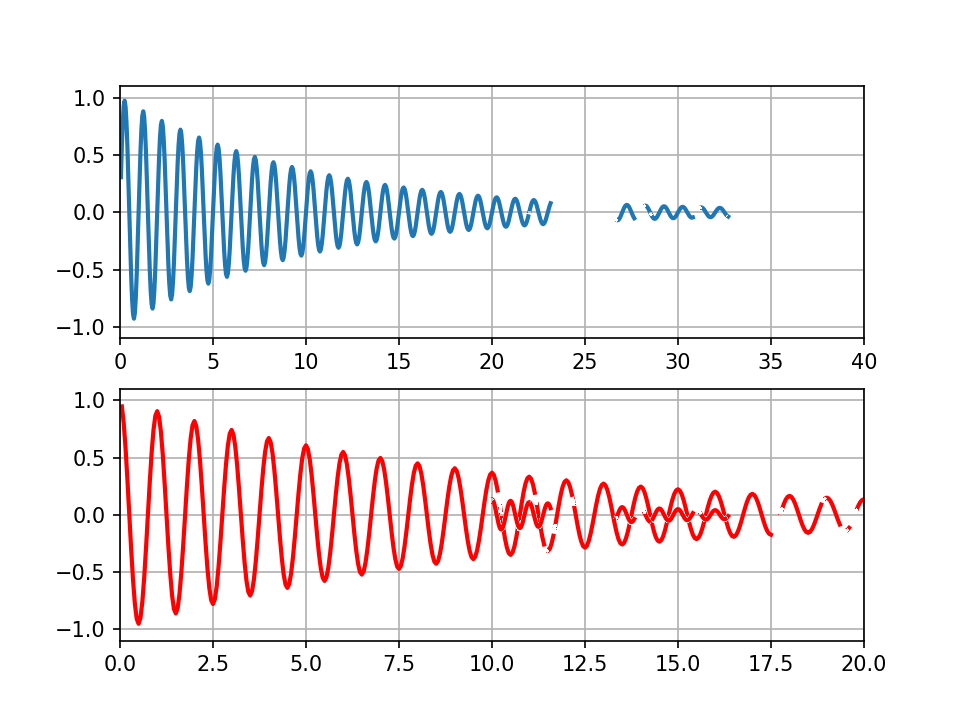

In [19]:
%matplotlib notebook
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y1 = np.sin(2*np.pi*t) * np.exp(-t/10.)
        y2 = np.cos(2*np.pi*t) * np.exp(-t/10.)
        yield t, y1, y2

data_gen.t = 0

# two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='r')
line = [line1, line2]

# the same axes initalizations as before
for ax in [ax1, ax2]:
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 5)
    ax.grid()

# initialize the data
xdata, y1data, y2data = [], [], []
def run(data):
    # update the data
    t, y1, y2 = data
    xdata.append(t)
    y1data.append(y1)
    y2data.append(y2)

    # axis limits checking
    for ax in [ax1, ax2]:
        xmin, xmax = ax.get_xlim()
        if t >= xmax:
            ax.set_xlim(xmin, 2*xmax)
            ax.figure.canvas.draw()

    # update the data of both line objects
    line[0].set_data(xdata, y1data)
    line[1].set_data(xdata, y2data)

    return line

ani = FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
plt.show()

### 6.4: Adding interactivity to plots

<IPython.core.display.Javascript object>


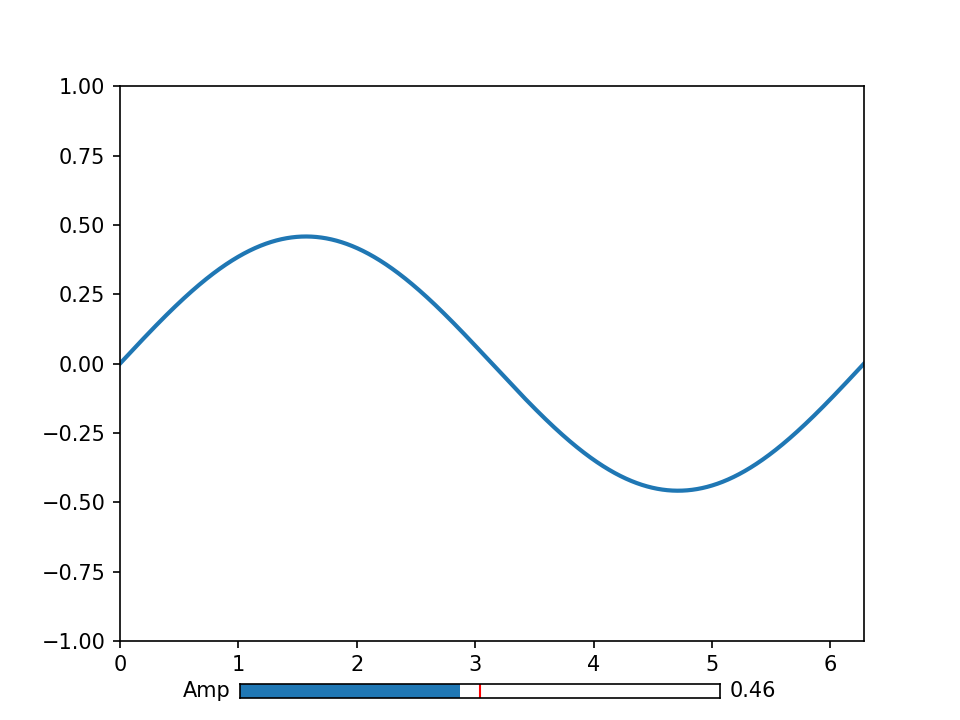

In [20]:
from matplotlib.widgets import Slider
%matplotlib notebook

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
initial_amp = .5
s = initial_amp*np.sin(t)
l, = plt.plot(t, s, lw=2)

ax = plt.axis([0,TWOPI,-1,1])

axamp = plt.axes([0.25, .03, 0.50, 0.02])
# Slider
samp = Slider(axamp, 'Amp', 0, 1, valinit=initial_amp)

def update(val):
    # amp is the current value of the slider
    amp = samp.val
    # update curve
    l.set_ydata(amp*np.sin(t))
    # redraw canvas while idle
    fig.canvas.draw_idle()

# call update function on slider value change
samp.on_changed(update)

plt.show()

### 6.5 Creating Visualizations that update interactively with data

In [21]:
def data_gen():
    while True:
        yield np.random.rand(10)

<IPython.core.display.Javascript object>


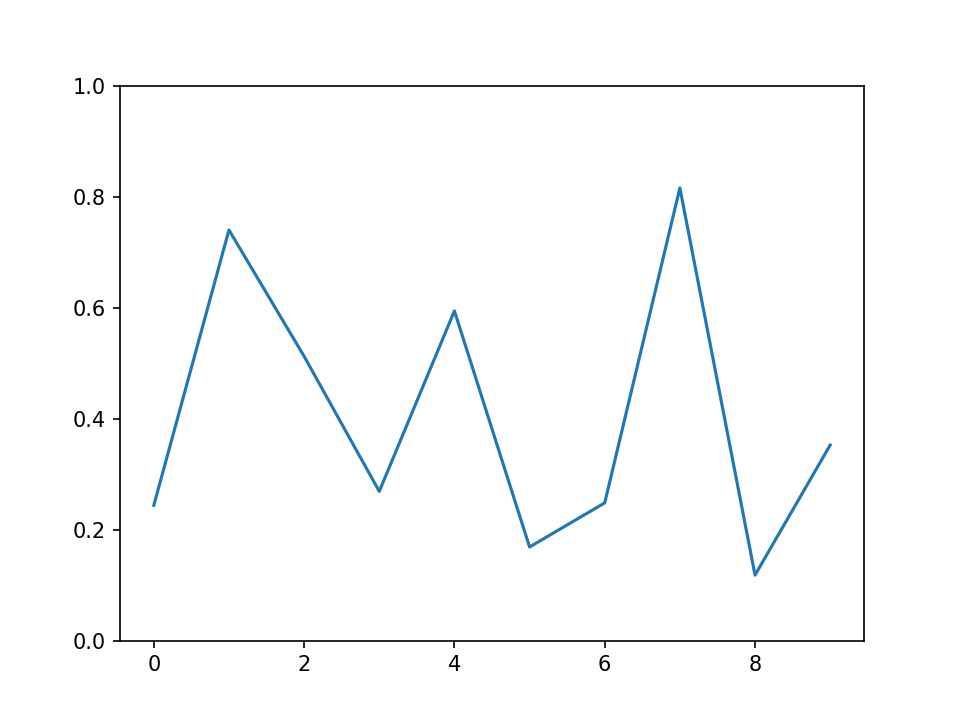

In [22]:
%matplotlib notebook
fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(10))
ax.set_ylim(0, 1)

def update(data):
    line.set_ydata(data)
    return line,

ani = FuncAnimation(fig, update, data_gen, interval=100)
plt.show()